# Proyecto
## TEL-354: Minería de Datos 2022-1 
### Prof. Mauricio Araya

## Shootings USA

## Para poder obtener una matriz de correlación ordenada, se redució el espectro de datos y de esta forma poder sacar una conclusión más clara y específica entre todos los datos que presnetaba el dataframe original

In [1]:
import pandas as pd
df_shooting5=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
deep_copy = df_shooting5.copy()
deep_copy.pop('Latitude')
deep_copy.pop('Longitude')
deep_copy.pop('Summary')
deep_copy.pop('Employed at')

deep_copy.pop('Open/Close Location')
deep_copy.pop('Title')
deep_copy.pop('Location')
deep_copy.pop('Incident Area')
deep_copy.pop('Policeman Killed')
deep_copy.pop('Date')
deep_copy.pop('Race')
#deep_copy.pop('Age')
deep_copy = deep_copy.dropna(axis=0)
deep_copy["Age"] = deep_copy["Age"].astype(str).astype(int) 
deep_copy.pop('Target')
deep_copy.pop('S#')
deep_copy

,Cause,Fatalities,Injured,Total victims,Age,Employeed (Y/N),Mental Health Issues,Gender
5,terrorism,3,0,3,24,1.0,Unclear,M
6,unemployement,5,0,5,45,1.0,Unclear,M
155,terrorism,1,6,6,19,1.0,No,Male
156,psycho,3,12,15,34,1.0,Unclear,M
157,psycho,4,16,19,34,1.0,Yes,Male
161,anger,1,3,4,23,0.0,No,Male
163,terrorism,13,3,15,34,1.0,Yes,Male
165,psycho,4,4,8,44,0.0,Unknown,Male
166,psycho,3,3,6,59,0.0,No,Male
171,psycho,5,2,6,64,0.0,No,Male


## En estos markdowns se puede observar información general de el dataframe, las columnas y sus tipos de datos

In [2]:
deep_copy.columns.values

array(['Cause', 'Fatalities', 'Injured', 'Total victims', 'Age',
       'Employeed (Y/N)', 'Mental Health Issues', 'Gender'], dtype=object)

In [3]:
deep_copy.dtypes

Cause                    object
Fatalities                int64
Injured                   int64
Total victims             int64
Age                       int32
Employeed (Y/N)         float64
Mental Health Issues     object
Gender                   object
dtype: object

In [4]:
df_shooting5.groupby(['Mental Health Issues']).mean()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
Mental Health Issues,,,,,,,,
No,195.956989,3.903226,3.408602,6.967742,0.064516,0.592593,37.542319,-94.265972
Unclear,67.076923,12.769231,50.000000,62.692308,1.000000,1.000000,35.873396,-94.776162
Unknown,94.027273,2.536364,3.281818,5.472727,0.045872,0.833333,36.522983,-92.294018
Yes,214.905660,5.811321,6.283019,11.698113,0.192308,0.535714,37.802552,-97.086961
unknown,107.000000,9.000000,1.000000,10.000000,0.000000,NaN,32.788387,-79.933143


## En este momento se crea la matriz de correlación que muestra la siguiente información

In [5]:
df_shooting5_mentalYes=deep_copy[deep_copy['Mental Health Issues']=='Yes']
df_shooting5_mentalNo=deep_copy[deep_copy['Mental Health Issues']=='No']
df_shooting5_mentalUnknown=deep_copy[deep_copy['Mental Health Issues']=='Unknown']
df_shooting5_mentalUnclear=deep_copy[deep_copy['Mental Health Issues']=='Unclear']
shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo])
#shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo,df_shooting5_mentalUnknown,df_shooting5_mentalUnclear])


In [6]:
#Matriz correlación
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr_matrix(data,features=None,annot=True,s=(20,20)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Matriz de Correlación Salud Mental", fontsize = 30)
    plt.show()

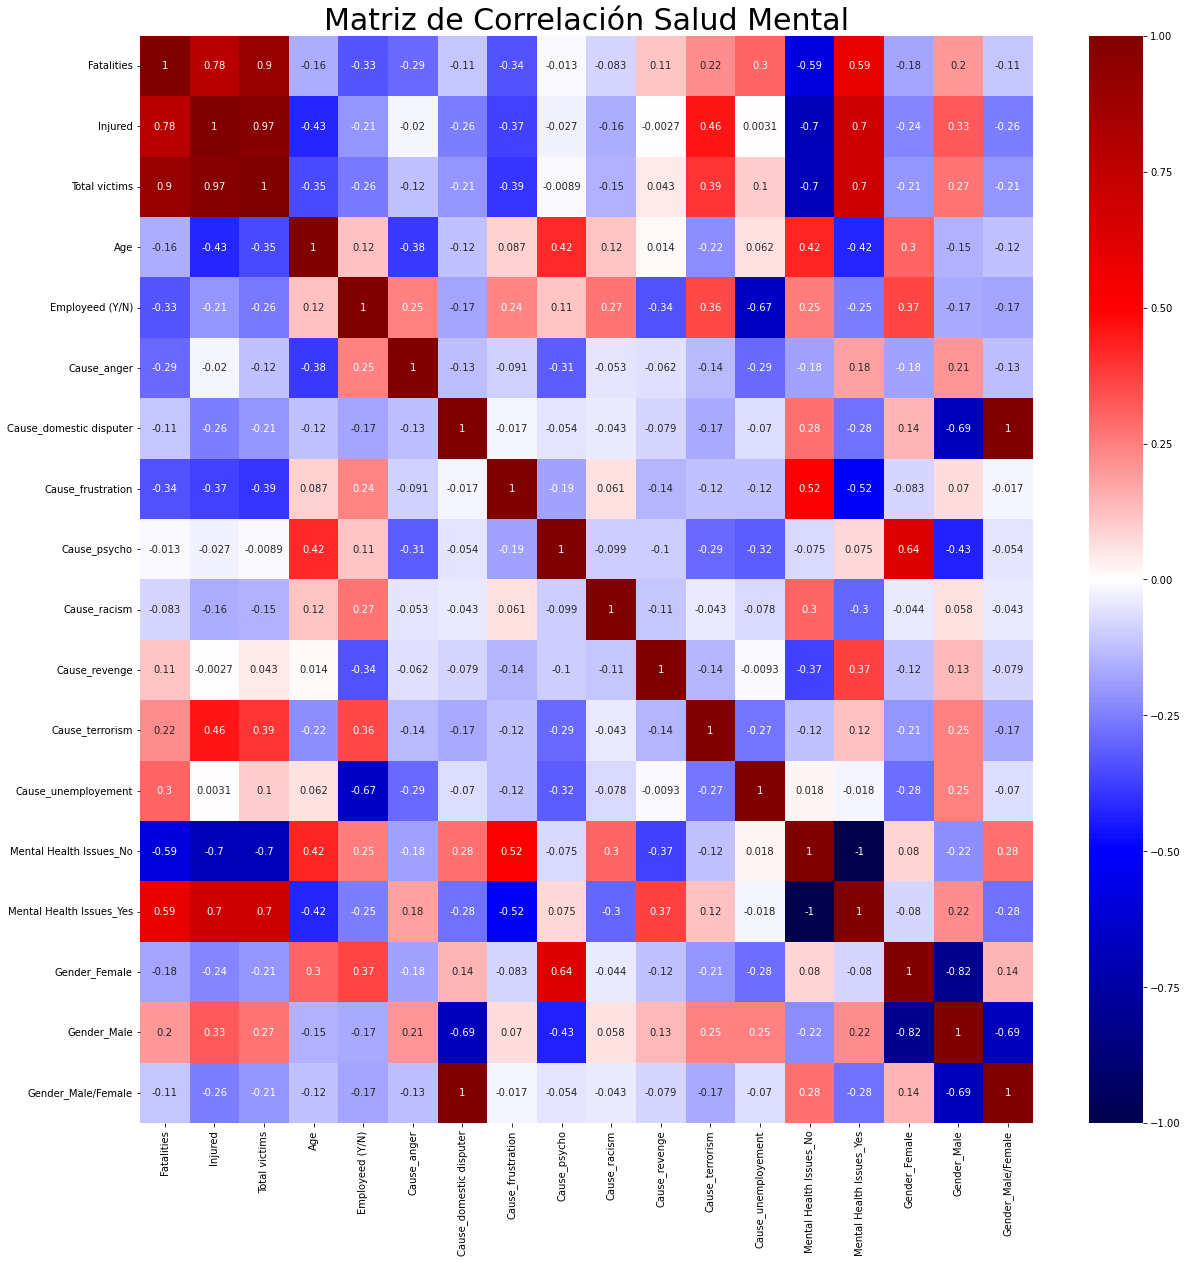

In [7]:
binarios_data_1=pd.get_dummies(shootings)

correlacion=binarios_data_1.corr(method='pearson')
plot_corr_matrix(correlacion)

#binarios_data_1

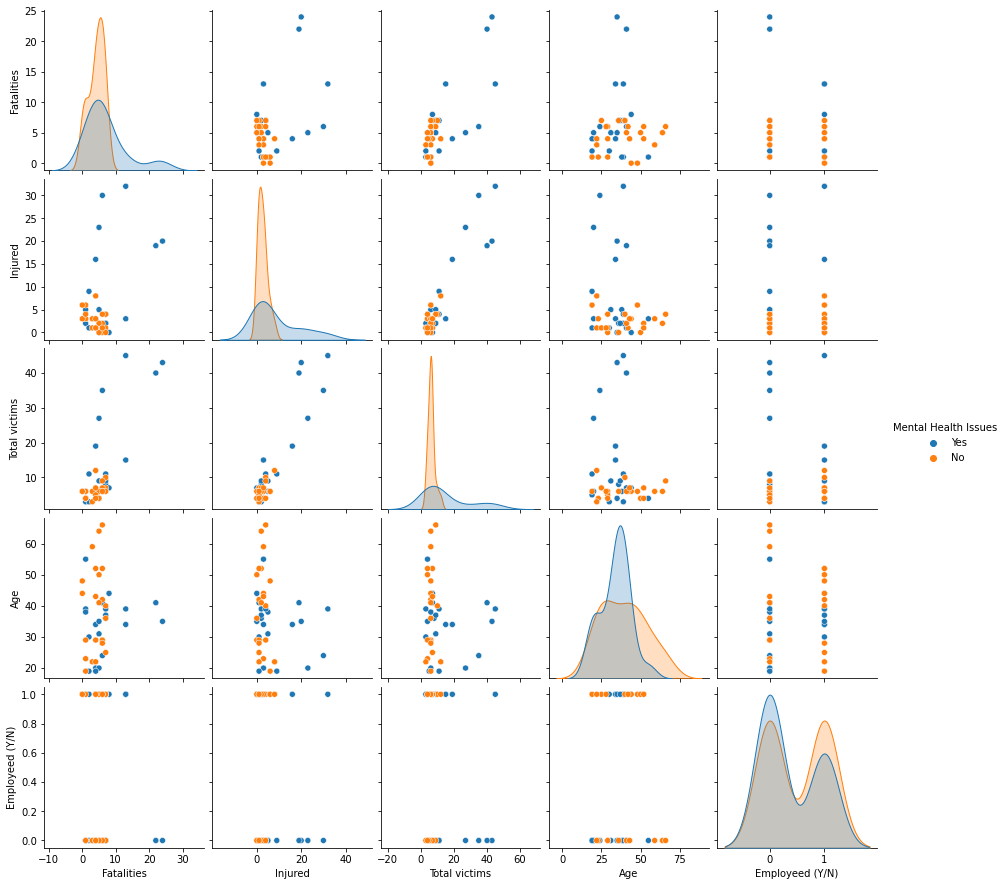

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#shootings tiene solo los yes y no de mental health
#deep_copy tiene todos los datos
sns.pairplot(shootings, hue="Mental Health Issues")

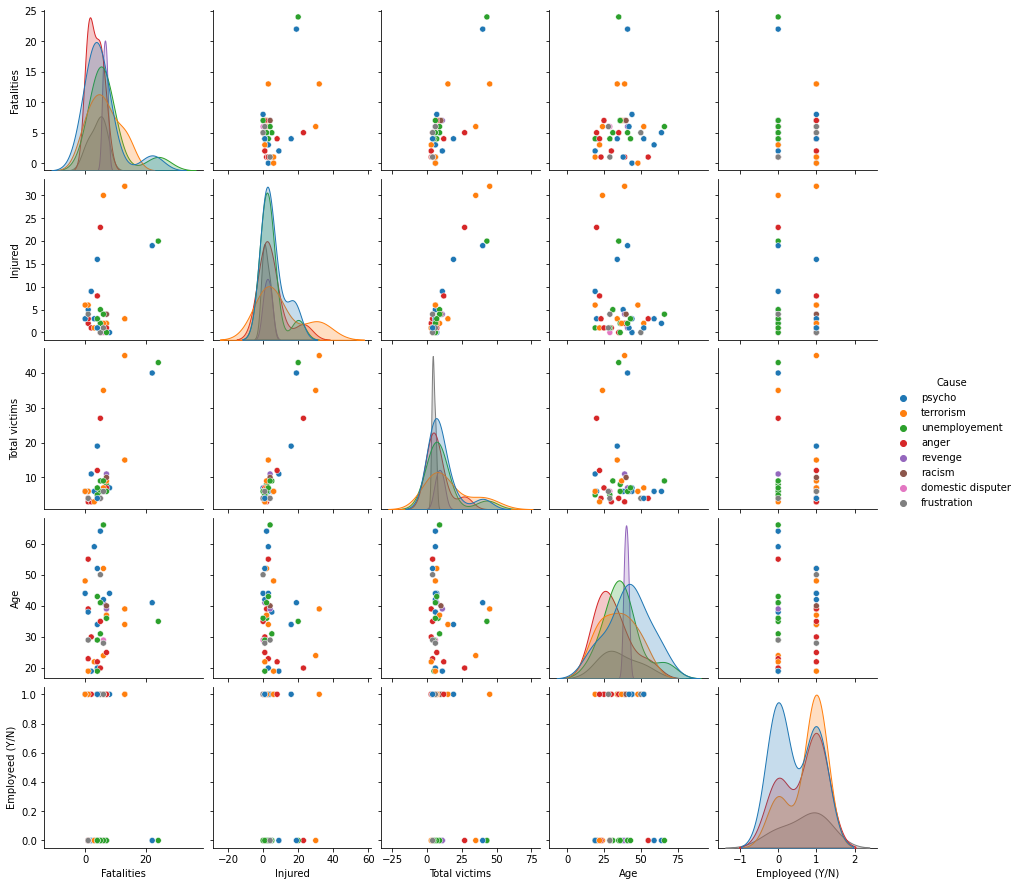

In [11]:
sns.pairplot(shootings, hue="Cause")

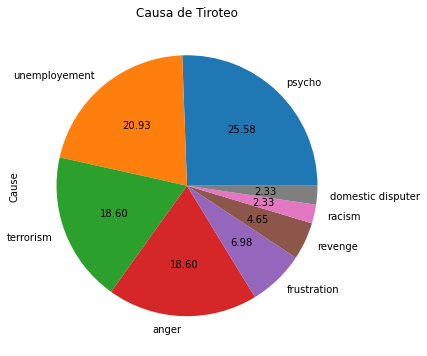

In [13]:
plot = shootings['Cause'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Causa de Tiroteo')

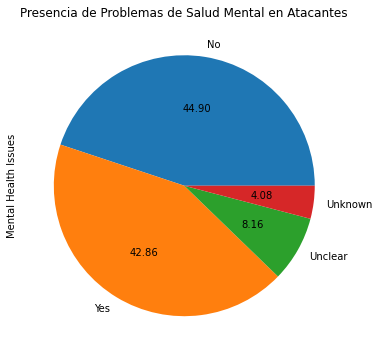

In [17]:
plot = deep_copy['Mental Health Issues'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Presencia de Problemas de Salud Mental en Atacantes')

In [18]:
pd.crosstab(index=deep_copy['Mental Health Issues'],
            columns=deep_copy['Cause'], margins=True)

Cause,anger,domestic disputer,frustration,psycho,racism,revenge,terrorism,unemployement,All
Mental Health Issues,,,,,,,,,
No,3,1,3,5,1,0,4,5,22
Unclear,1,0,0,1,0,0,1,1,4
Unknown,0,0,1,1,0,0,0,0,2
Yes,5,0,0,6,0,2,4,4,21
All,9,1,4,13,1,2,9,10,49


In [20]:

# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=deep_copy['Mental Health Issues'], columns=deep_copy['Cause'],
            margins=True).apply(lambda r: r/len(deep_copy) *100,
                                axis=1)

Cause,anger,domestic disputer,frustration,psycho,racism,revenge,terrorism,unemployement,All
Mental Health Issues,,,,,,,,,
No,6.122449,2.040816,6.122449,10.204082,2.040816,0.000000,8.163265,10.204082,44.897959
Unclear,2.040816,0.000000,0.000000,2.040816,0.000000,0.000000,2.040816,2.040816,8.163265
Unknown,0.000000,0.000000,2.040816,2.040816,0.000000,0.000000,0.000000,0.000000,4.081633
Yes,10.204082,0.000000,0.000000,12.244898,0.000000,4.081633,8.163265,8.163265,42.857143
All,18.367347,2.040816,8.163265,26.530612,2.040816,4.081633,18.367347,20.408163,100.000000


In [21]:
# tabla de contingencia en porcentajes relativos segun salud mental
pd.crosstab(index=deep_copy['Mental Health Issues'], columns=deep_copy['Cause']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Cause,anger,domestic disputer,frustration,psycho,racism,revenge,terrorism,unemployement
Mental Health Issues,,,,,,,,
No,13.636364,4.545455,13.636364,22.727273,4.545455,0.00000,18.181818,22.727273
Unclear,25.000000,0.000000,0.000000,25.000000,0.000000,0.00000,25.000000,25.000000
Unknown,0.000000,0.000000,50.000000,50.000000,0.000000,0.00000,0.000000,0.000000
Yes,23.809524,0.000000,0.000000,28.571429,0.000000,9.52381,19.047619,19.047619


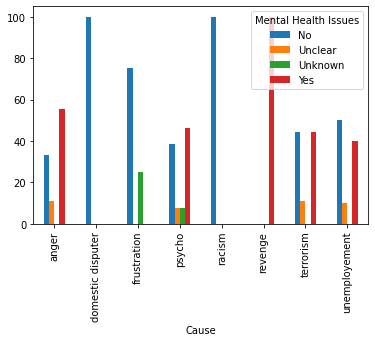

In [22]:

# Gráfico de barras de salud mental segun causa
plot = pd.crosstab(index=deep_copy['Cause'],
            columns=deep_copy['Mental Health Issues']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

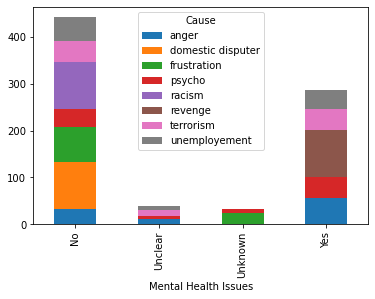

In [23]:

# Gráfico de barras de salud mental segun causa
plot = pd.crosstab(index=deep_copy['Mental Health Issues'],
            columns=deep_copy['Cause']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)